# Exploratory Data Analysis

### By: Tejas Yogesh Pawar

**======================================================================**

#### Firstly we imported all the required libraries and dataset itslef

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

dataset=pd.read_csv('haberman.csv',names=['Age','Operation year','Axillary nodes','Survival status'])

In [2]:
#Mapping the target variable
dataset['Survival status']=dataset['Survival status'].map({1:'Survived',2:'Died'})
dataset.head()

,Age,Operation year,Axillary nodes,Survival status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


## Q.2 Mention High level statistics of the dataset: number of points, number of features, number of classes, data-points per class.

In [3]:
# number of data points and features
print(dataset.shape)

(306, 4)


In [4]:
# number of classes
dataset.columns

Index(['Age', 'Operation year', 'Axillary nodes', 'Survival status'], dtype='object')

In [5]:
# number of data points in each class
dataset["Survival status"].value_counts()

Survived    225
Died         81
Name: Survival status, dtype: int64

### Observation:
1) Total 306 patients of which 225 patients successfully survived for 5 or more years after their operation. 

2) 81 patients didn't survive more than 5 years after their operation.

# Q1.3 Objective:
#### To find and predict whether the patient will survive the given treatment or not.


# Q1.4Univariate analysis 

## PDF:

In [6]:
dataset_survived=dataset.loc[dataset['Survival status']=='Survived']
dataset_died=dataset.loc[dataset['Survival status']=='Died']

Text(0.5, 1.0, 'PDF PLOT 1 CORRESPONDING TO AGE FEATURE')

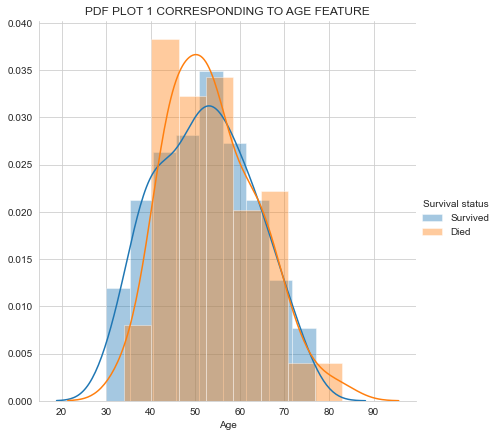

In [7]:
#Age
sns.FacetGrid(dataset,hue='Survival status',size=6).map(sns.distplot,'Age').add_legend()
plt.title('PDF PLOT 1 CORRESPONDING TO AGE FEATURE')

Text(0.5, 1.0, 'PDF PLOT 2 CORRESPONDING TO OPERATION YEAR FEATURE')

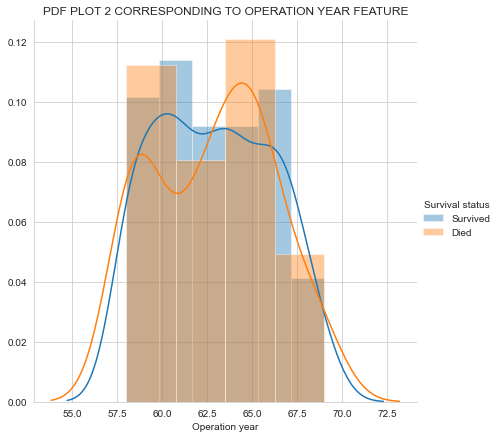

In [8]:
# Operataion Year
sns.FacetGrid(dataset,hue='Survival status',size=6).map(sns.distplot,'Operation year').add_legend()
plt.title('PDF PLOT 2 CORRESPONDING TO OPERATION YEAR FEATURE')

Text(0.5, 1.0, 'PDF PLOT 3 CORRESPONDING TO AXIL NODES FEATURE')

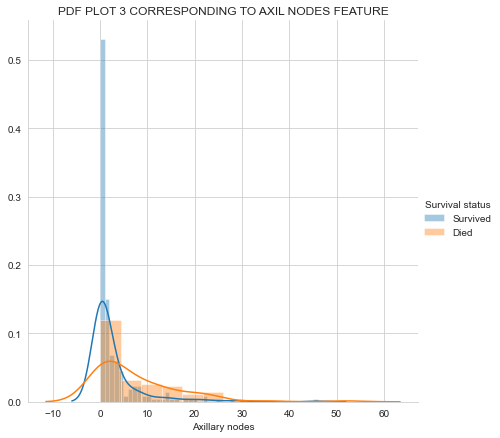

In [9]:
# axil_nodes
sns.FacetGrid(dataset,hue='Survival status',size=6).map(sns.distplot,'Axillary nodes').add_legend()
plt.title('PDF PLOT 3 CORRESPONDING TO AXIL NODES FEATURE')

### Observations:
1) For feature 'Axillary nodes, the likelihood of a data point belonging to Survived class is very high when the number of axillary nodes detected are 0.

2) The Histograms and PDFs for both the class for feature 'Age' and 'Operation year' are overlapping. No inference can be drawn from the plots for 'Age' and 'Operation year'.

3) We cannot build a simple model using if else condition for classification as there is a lot of overlapping between the data points

4) Compared to Age and Operation year, Axillary nodes is the most useful feature.

## CDF

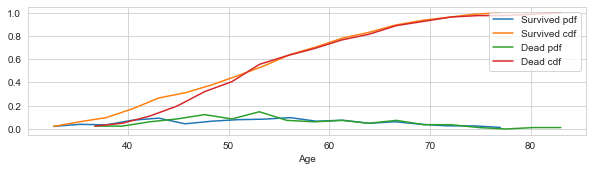

In [10]:
#CDF for Age 
plt.figure(1,figsize=(10,8))
# Class: Survived
plt.subplot(312)
counts, bin_edges = np.histogram(dataset_survived['Age'], bins=18, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Class: Dead
counts, bin_edges = np.histogram(dataset_died['Age'], bins=18,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Age')
plt.legend(('Survived pdf', 'Survived cdf', 'Dead pdf','Dead cdf'),loc='upper right')

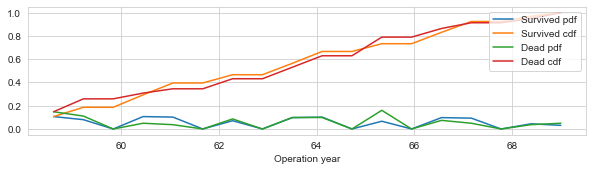

In [11]:
#CDF for Operation year
plt.figure(1,figsize=(10,8))
#Class:Survived
plt.subplot(313)
counts, bin_edges = np.histogram(dataset_survived['Operation year'], bins=18, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



# Class: Dead
counts, bin_edges = np.histogram(dataset_died['Operation year'], bins=18,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.xlabel('Operation year')
plt.legend(('Survived pdf', 'Survived cdf', 'Dead pdf','Dead cdf'),loc='upper right')
plt.show()

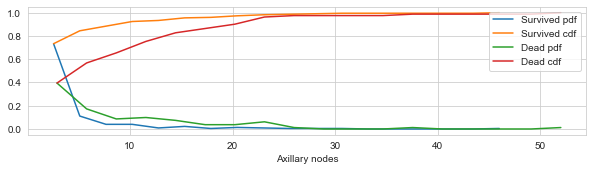

In [12]:
#CDF for Axillary node

plt.figure(1,figsize=(10,8))

# Class: Survived
plt.subplot(311)
counts, bin_edges = np.histogram(dataset_survived['Axillary nodes'], bins=18, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Class: Dead
counts, bin_edges = np.histogram(dataset_died['Axillary nodes'], bins=18,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.xlabel('Axillary nodes')
plt.legend(('Survived pdf', 'Survived cdf', 'Dead pdf','Dead cdf'),loc='upper right')

### Observations:
1) Around 90% of those who survived had axillary nodes less than 10, but we cannot draw direct conclusion from these as around 70% of those who died had axillary nodes less than 10

2) For features 'Age' and 'Operation year',the cdf and pdf for both the class are almost the same.

# Box plot

<AxesSubplot:xlabel='Survival status', ylabel='Axillary nodes'>

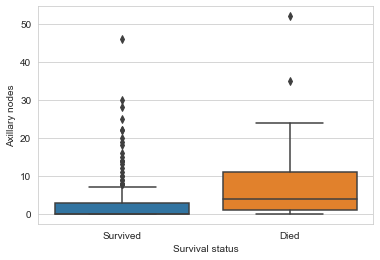

In [13]:
sns.boxplot(x='Survival status',y='Axillary nodes',data=dataset)

<AxesSubplot:xlabel='Survival status', ylabel='Operation year'>

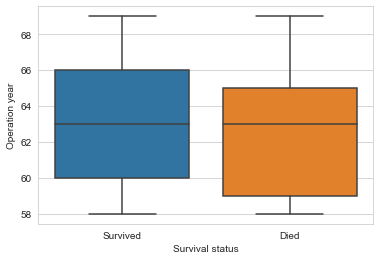

In [14]:
sns.boxplot(x='Survival status',y='Operation year',data=dataset)


<AxesSubplot:xlabel='Survival status', ylabel='Age'>

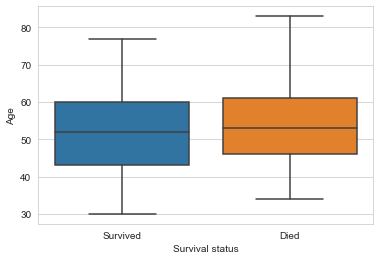

In [15]:
sns.boxplot(x='Survival status',y='Age',data=dataset)


# Violin plot

<AxesSubplot:xlabel='Survival status', ylabel='Axillary nodes'>

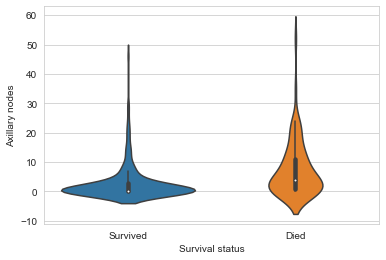

In [16]:
sns.violinplot(x='Survival status', y='Axillary nodes', data=dataset)


<AxesSubplot:xlabel='Survival status', ylabel='Age'>

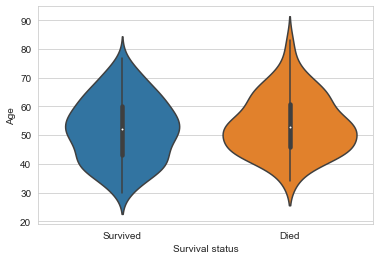

In [17]:
sns.violinplot(x='Survival status', y='Age', data=dataset)


### Observations:
1) We can see that around 50% of the patients that survived had 0 axillary nodes. Almost 75% of the patients that died had more than 1 axillary nodes. As the number of axillary nodes detected increases the likelihood of a patient not surviving after 5 years increases.

2) The plots for feature 'Age' and 'Operation year' are almost the same for both the class.

# Q1.4 Bivalriate Analysis

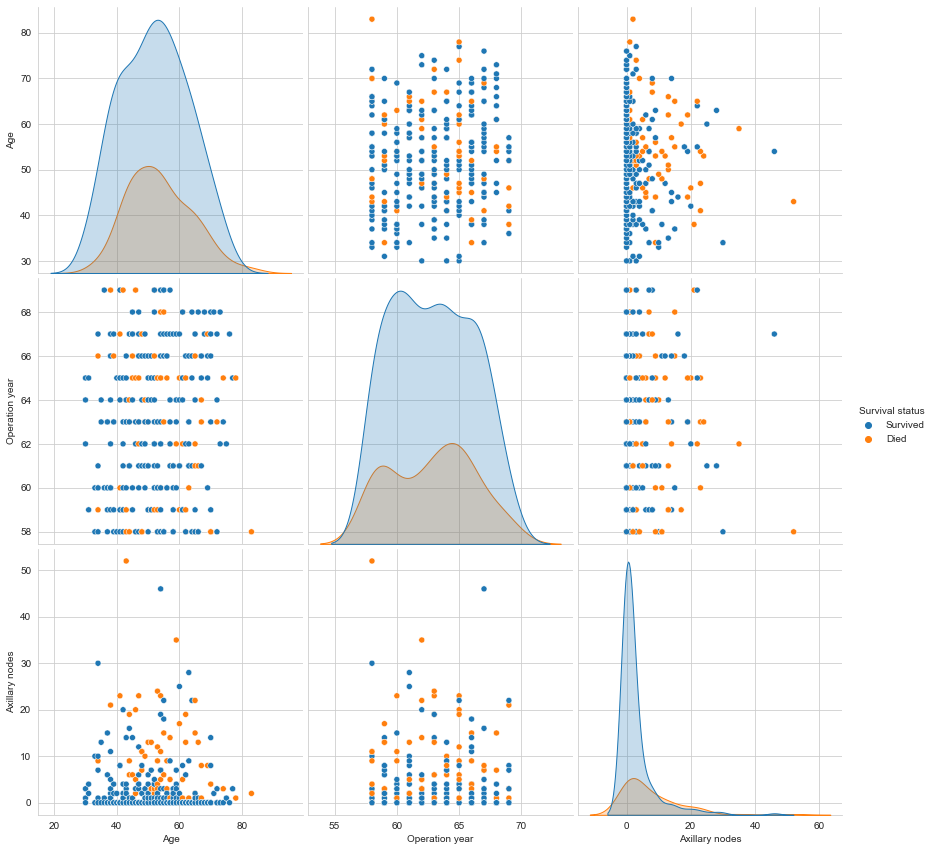

In [18]:
# pairwise scatter plot: Pair-Plot
sns.set_style('whitegrid')
sns.pairplot(dataset,hue='Survival status',size=4)
plt.show()

### Observations:
1) In all the above scatter plots we cannot linearly separate the output variables as most of them are overlapping.

2) The only insight we can get is from the 'Axillary node vs Age' plot that most of the people that survived had 0 axillary nodes.

### Conclusion :
Among the 3 features 'Age','Axillary nodes' and 'Operation year', Axillary nodes is the most important one to predict the survival status.

For the feature Age and Operation year, we can see a lot of overlapping between the data points.

For the feature Axillary nodes, we can observe that almost 90% of the patients who survived had less than 8 axillary nodes, while for those that did not survive the spread is wide.

### =========================================================================================

# Question 2. What is the probability of observing different numbers of heads in 10 tosses with a fair coin? Find which distribution will get apply and plot it. Write a python script to draw the distribution. Hints: Binomial Distribution.

 For instance, the trials may consist of 10 coin flips — each of them is a binary experiment with two possible outcomes: heads or tails. 
The probability of success, defined as tossing heads, is 50%, assuming the coin is fair.

The **binomial distribution** can answer the question: what is the probability of observing different numbers of heads in 10 tosses with a fair coin?

Text(0.5, 1.0, 'The probability of getting X heads in 10 fair coin tosses')

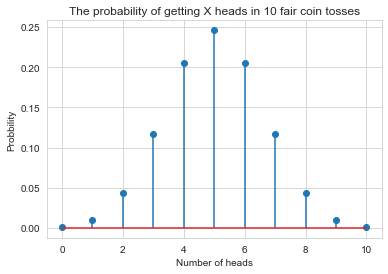

In [22]:
#Python Script for plotiing the distribution
from scipy.stats import binom

num_trials = 10
heads_probability = .5

probs = [binom.pmf(i, num_trials, heads_probability) for i in range(11)]
plt.stem(list(range(11)), probs)
plt.xlabel('Number of heads')
plt.ylabel('Probbility')
plt.title('The probability of getting X heads in 10 fair coin tosses')

The binomial probability mass function plotted above is the answer. You can see that it’s most likely to observe 5 heads in 10 tosses, and the probability of such an outcome is roughly 25%.

### =================================================================================

# Question 3. Imagine you have a machine learning model deployed in the cloud and receiving requests from your customers in real-time. How much cloud resources do you need to pay for in order to be 99% sure you can serve all the traffic that arrives at the model in any one-minute period? (Note: 3.3 requests on average based on your traffic data). Draw the distribution using python. Hints: Poisson distribution

 To answer this question, you first need to know how many requests are coming, on average, in a one-minute period. Say that it’s 3.3 requests on average based on your traffic data. That’s your λ, and hence the Poisson distribution describing your data looks like this:

Text(0.5, 1.0, 'The probability of X requests coming within a one-minute period, based on the average rate of 3.3.')

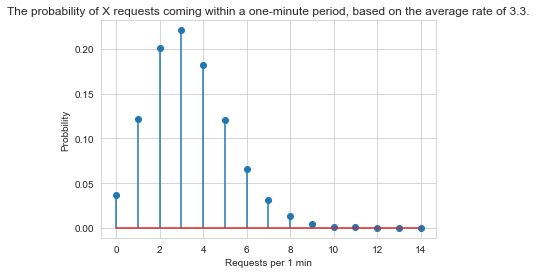

In [26]:
# Plotting poison distribution using python 
from scipy.stats import poisson

rate = 3.3

probs = [poisson.pmf(i, rate) for i in range(15)]
plt.stem(list(range(15)), probs)
plt.xlabel('Requests per 1 min')
plt.ylabel('Probbility')
plt.title('The probability of X requests coming within a one-minute period, based on the average rate of 3.3.')

In [24]:
simulated_request_per_minute = poisson.rvs(3.3, size=1_000_000)
np.percentile(simulated_request_per_minute, 99)

8.0

 This yields 8, meaning that if you buy enough resources to process 8 requests per minute, you can be 99% sure to process all the traffic in any one-minute period.

## ====================================================================
## ====================================================================